Estudiante: Espinosa Torres Edgar Fernando.

En este notebook se presentan los siguientes programas escritos en Python:
1. Dado virtual con histograma
2. Triángulo de Sierpinsky y generalización para cualquier n > 0
3. Cálculo de las cifras de Pi (mediante algoritmos de Chudnovsky y Gauss-Legendre) con histograma
4. Clasificador bayesiano (Naive Bayes Gaussiano)




Dado virtual

In [ ]:
import time
import math

def lanzar_dado():
    # Obtener el tiempo actual en segundos y microsegundos
    t = time.time()
    _, microsegundos = math.modf(t)
    '''Los multiplica por 1,000,000 para obtener un número entero.
       Este número se utiliza como una "semilla" para generar un número pseudoaleatorio.'''
    semilla = int((t + microsegundos) * 1_000_000)
    '''La semilla se procesa con una operación de módulo % 6 para obtener un número en el rango de 0 a 5.
       Luego, se le suma 1 para obtener un número en el rango de 1 a 6, que son los posibles resultados en un dado estándar.'''
    semilla = semilla % 6 + 1
    return semilla

# Lanzar el dado
resultado = lanzar_dado()
print("El dado cayó en:", resultado)

El dado cayó en: 1


**1.- Dado virtual más histograma**

Introduce la cantidad de tiradas del dado: 1000


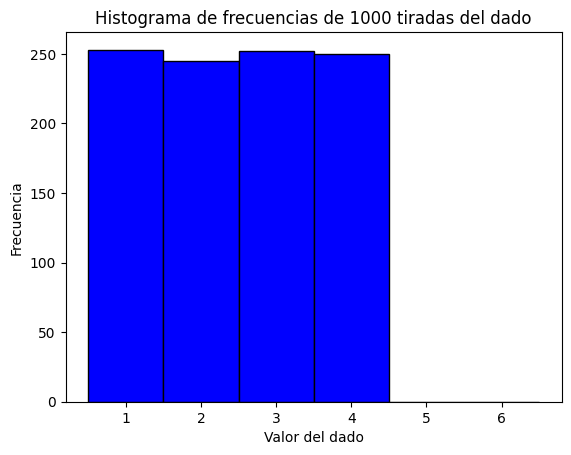

In [ ]:
import time
import math
import matplotlib.pyplot as plt

def lanzar_dado():
    t = time.time()
    _, microsegundos = math.modf(t)
    semilla = int((t + microsegundos) * 1_000_000)
    semilla = semilla % 6 + 1
    return semilla

# Pedir al usuario la cantidad de tiradas
num_tiradas = int(input("Introduce la cantidad de tiradas del dado: "))

# Generar las tiradas del dado y las guarda en una lista (mediante una List Comprehension)
resultados = [lanzar_dado() for _ in range(num_tiradas)]

# Crear un histograma de los resultados
plt.hist(resultados, bins=range(1, 8), align='left', color='blue', edgecolor='black')
plt.title(f'Histograma de frecuencias de {num_tiradas} tiradas del dado')
plt.xlabel('Valor del dado')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 7))
plt.show()

**2.- Triánguli de Sierpinski y generalización**

Ingrese el número de caras del dado: 6
Ingrese el número de iteraciones: 10000


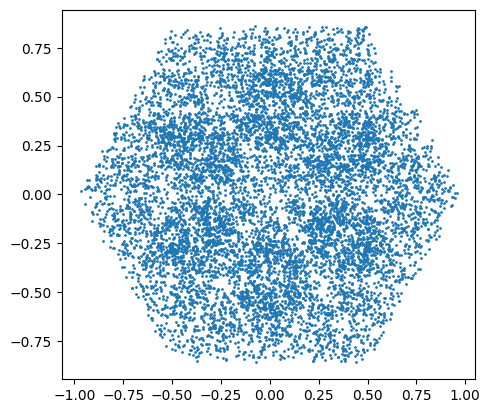

In [ ]:
import matplotlib.pyplot as plt
import random
import math


'''
Seleccionamos la cantidad n de vértices del polígono (que será igual a la cantidad de caras del dado).
Partimos del punto (0,0) y dependiendo de que número haya caído en el dado, seleccionamos el vértice que tiene ese número,
calculamos el punto medio entre (0,0) y el vértice. Lo pintamos, este nuevo punto ahora hace la función de (0,0),
es ahora el nuevo punto inicial, hacemos este proceso iterativamente.
'''
def punto_medio(p1, p2):
    return ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)

def vertices_poligono(n, radio=1):
    angulo = 2 * math.pi / n
    return [(math.cos(i * angulo) * radio, math.sin(i * angulo) * radio) for i in range(n)]

def dibujar_fractal():
    n = int(input("Ingrese el número de caras del dado: "))
    iteraciones = int(input("Ingrese el número de iteraciones: "))

    vertices = vertices_poligono(n)

    # Punto inicial en el centro
    p = (0, 0)

    puntos_x = [p[0]]
    puntos_y = [p[1]]

    for _ in range(iteraciones):
        dado = random.randint(0, n-1)
        p = punto_medio(p, vertices[dado])
        puntos_x.append(p[0])
        puntos_y.append(p[1])

    plt.scatter(puntos_x, puntos_y, s=1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Ejecutar la función
dibujar_fractal()

**3.- Cálculo de las cifras de Pi (mediante algoritmos de Chudnovsky y Gauss-Legendre) con histograma**

Chudnovsky

Ingrese el número de dígitos de precisión para Pi: 1000


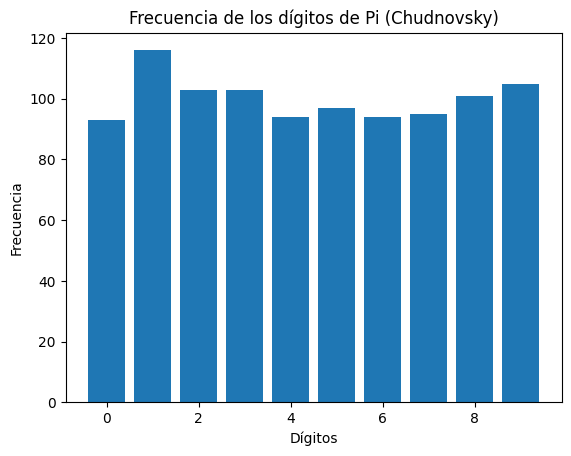

In [ ]:
import decimal
import matplotlib.pyplot as plt
from collections import Counter

def calcular_pi_chudnovsky(precision):
    decimal.getcontext().prec = precision + 1
    multiplicador = 426880 * decimal.Decimal(10005).sqrt()
    termino_m = 1
    termino_l = 13591409
    termino_x = 1
    factor_k = 6
    suma = termino_l
    for i in range(1, precision):
        termino_m = (factor_k**3 - 16*factor_k) * termino_m // i**3
        termino_l += 545140134
        termino_x *= -262537412640768000
        suma += decimal.Decimal(termino_m * termino_l) / termino_x
        factor_k += 12
    pi_truncado = multiplicador / suma
    return pi_truncado

def contar_digitos(pi_truncado):
    contador = Counter(str(pi_truncado).replace('.', ''))  # Excluye el punto decimal
    return contador

def mostrar_histograma(contador):
    fig, ax = plt.subplots()
    digitos = range(10)
    frecuencias = [contador[str(digito)] for digito in digitos]
    ax.bar(digitos, frecuencias)
    ax.set_xlabel('Dígitos')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los dígitos de Pi (Chudnovsky)')
    plt.show()

# Solicitar al usuario que ingrese el número de dígitos de precisión
n = int(input("Ingrese el número de dígitos de precisión para Pi: "))
pi_calculado = calcular_pi_chudnovsky(n)
contador_digitos = contar_digitos(pi_calculado)
mostrar_histograma(contador_digitos)

Gauss-Legendre

In [ ]:
import decimal
import matplotlib.pyplot as plt
from collections import Counter

def calcular_pi_gauss_legendre(precision):
    decimal.getcontext().prec = precision + 1

    a = decimal.Decimal(1)
    b = 1 / decimal.Decimal(2).sqrt()
    t = decimal.Decimal(1) / 4
    p = decimal.Decimal(1)

    for _ in range(precision):
        a_next = (a + b) / 2
        b = (a * b).sqrt()
        t -= p * (a - a_next) ** 2
        a = a_next
        p *= 2

    pi_truncado = (a + b) ** 2 / (4 * t)
    return pi_truncado

def contar_digitos(pi_truncado):
    contador = Counter(str(pi_truncado).replace('.', ''))  # Excluye el punto decimal
    return contador

def mostrar_histograma(contador):
    fig, ax = plt.subplots()
    digitos = range(10)
    frecuencias = [contador[str(digito)] for digito in digitos]
    ax.bar(digitos, frecuencias)
    ax.set_xlabel('Dígitos')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los dígitos de Pi (Gauss-Legendre)')
    plt.show()

# Solicitar al usuario que ingrese el número de dígitos de precisión
n = int(input("Ingrese el número de dígitos de precisión para Pi: "))
pi_calculado = calcular_pi_gauss_legendre(n)
contador_digitos = contar_digitos(pi_calculado)
mostrar_histograma(contador_digitos)

**4.- Clasificador bayesiano (Naive Bayes gaussiano)**

Las siguientes dos líneas de código sirven para subir el dataset "hepatitis_imputed_correctly.csv" al notebook:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hepatitis_imputed_correctly.csv to hepatitis_imputed_correctly.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import LeaveOneOut

class GaussianNaiveBayes_Laplace:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Parámetro de suavizado de Laplace

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = {}

        for cls in self.classes:
            X_cls = X[y == cls]
            self.parameters[cls] = {
                'prior': len(X_cls) / len(X),
                'mean': X_cls.mean(axis=0),
                'var': X_cls.var(axis=0) + self.alpha  # Agrega suavizado de Laplace
            }

    def calcular_likelihood(self, mean, var, x):
        exponent = np.exp(-((x-mean)**2 / (2 * var)))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def calcular_posterior(self, x):
        posteriors = []

        for cls in self.classes:
            prior = np.log(self.parameters[cls]['prior'])
            conditional = np.sum(np.log(self.calcular_likelihood(
                self.parameters[cls]['mean'],
                self.parameters[cls]['var'],
                x)))
            posterior = prior + conditional
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        predictions = [self.calcular_posterior(x) for x in X]
        return predictions

# Ubicación del dataset
data = pd.read_csv('/content/hepatitis_imputed_correctly.csv')

# Ejemplo con datos de hepatitis
file_path_hepatitis = 'hepatitis_imputed_correctly.csv'
data_hepatitis = pd.read_csv(file_path_hepatitis)
data_hepatitis['Class'] = data_hepatitis['Class'].map({1: 1, 2: 0})  # Ajustar las etiquetas

X_hepatitis = data_hepatitis.drop('Class', axis=1).values
y_hepatitis = data_hepatitis['Class'].values

# Inicializar el clasificador
model_laplace = GaussianNaiveBayes_Laplace()

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
tp, fn, fp, tn = 0, 0, 0, 0

for train_index, test_index in loo.split(X_hepatitis):
    X_train, X_test = X_hepatitis[train_index], X_hepatitis[test_index]
    y_train, y_test = y_hepatitis[train_index], y_hepatitis[test_index]

    model_laplace.fit(X_train, y_train)
    prediction = model_laplace.predict(X_test)[0]

    if prediction == 1:
        if y_test == 1:
            tp += 1
        else:
            fp += 1
    else:
        if y_test == 0:
            tn += 1
        else:
            fn += 1

# Calcular métricas
tp_rate = tp / (tp + fn)
tn_rate = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * tp_rate) / (precision + tp_rate)
balanced_accuracy = (tp_rate + tn_rate) / 2
mcc_numerator = tp * tn - fp * fn
mcc_denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
mcc = mcc_numerator / mcc_denominator if mcc_denominator != 0 else 0

# Mostrar resultados
print(f"TP: {tp}, FN: {fn}, FP: {fp}, TN: {tn}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"TP Rate: {tp_rate}")
print(f"TN Rate: {tn_rate}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1_score}")
print(f"MCC: {mcc}")

TP: 22, FN: 10, FP: 9, TN: 114
Balanced Accuracy: 0.8071646341463414
TP Rate: 0.6875
TN Rate: 0.926829268292683
Precision: 0.7096774193548387
F1-Score: 0.6984126984126984
MCC: 0.6216372952367548


Captura de los resultados:

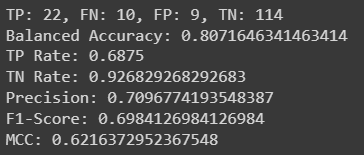